# Explore here

In [1]:
# Your code here
import requests

# URL del archivo CSV
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

# Hacer una solicitud GET para obtener el archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Guardar el contenido del archivo en la carpeta data/raw
    with open('/workspaces/Finarosalina_machine-learning-python-template/data/raw/bank-marketing-campaign-data.csv', 'wb') as file:
        file.write(response.content)
    print("Archivo descargado correctamente!")
else:
    print(f"Hubo un problema al descargar el archivo: {response.status_code}")


Archivo descargado correctamente!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



df=pd.read_csv('/workspaces/Finarosalina_machine-learning-python-template/data/raw/bank-marketing-campaign-data.csv',  sep=';')
df.head()
# shape  (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Verificar si hay filas duplicadas
duplicados = df.duplicated()
print(df[duplicados])

# Veo que hay 12 filas duplicadas, por lo que las elimino
print(f"Total de filas duplicadas: {duplicados.sum()}")

In [5]:
df=df.drop_duplicates()
duplicados = df.duplicated()
print(f"Total de filas duplicadas: {duplicados.sum()}")

Total de filas duplicadas: 0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

Variables categoricas: 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 

'y' : TARGET; El cliente contrata un depósito a largo plazo o no (categórico)

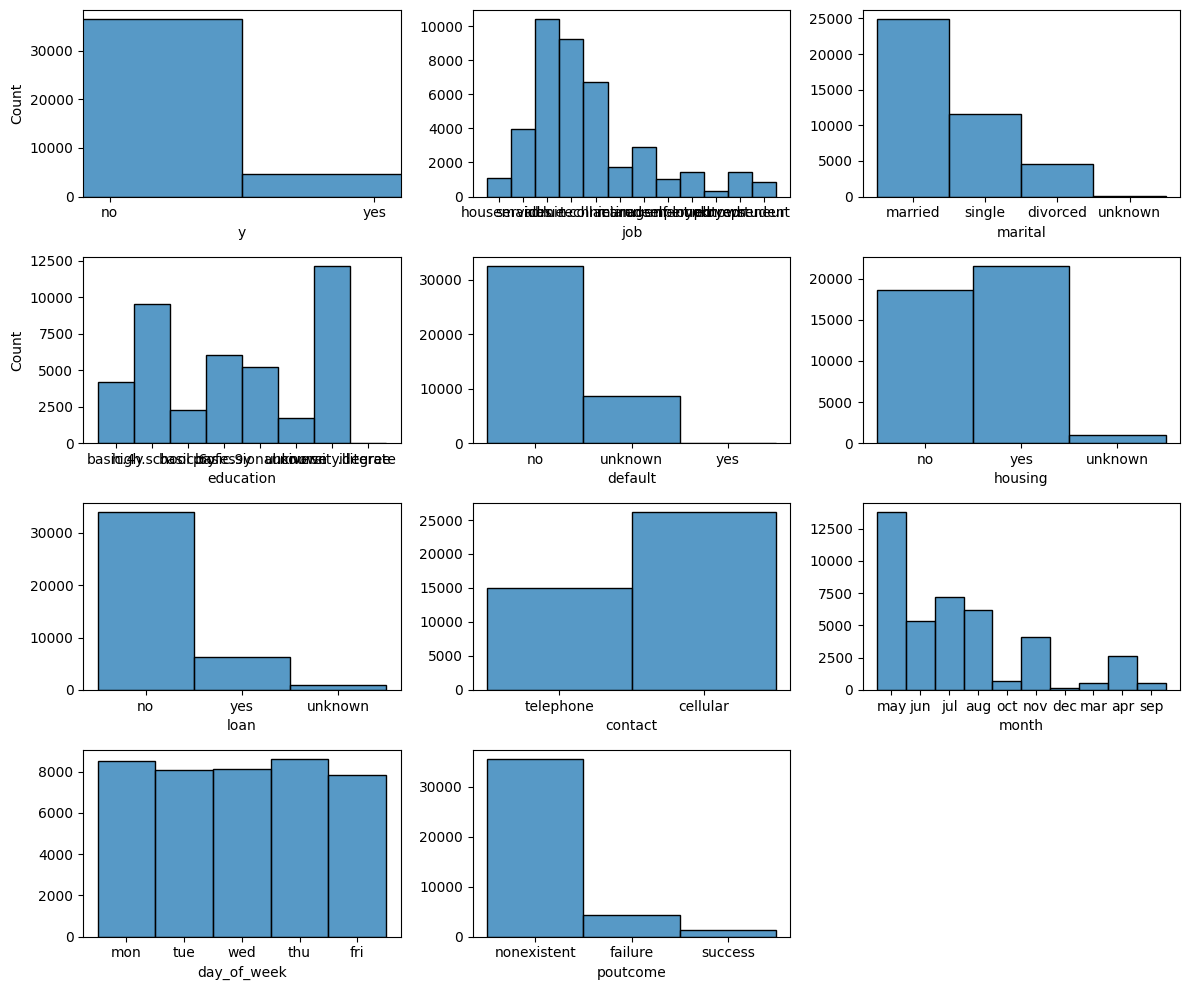

In [4]:
fig, axis = plt.subplots(4, 3, figsize=(12, 10))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=df, x="y").set_xlim(-0.1, 1.1)
sns.histplot(ax=axis[0, 1], data=df, x="job").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=df, x="marital").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df, x="education")
sns.histplot(ax=axis[1, 1], data=df, x="default").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=df, x="housing").set(ylabel=None)
sns.histplot(ax=axis[2, 0], data=df, x="loan").set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=df, x="contact").set(ylabel=None)
sns.histplot(ax=axis[2, 2], data=df, x="month").set(ylabel=None)
sns.histplot(ax=axis[3, 0], data=df, x="day_of_week").set(ylabel=None)
sns.histplot(ax=axis[3, 1], data=df, x="poutcome").set(ylabel=None)

# Eliminar el subplot vacío que sobra (axis[3, 2])
fig.delaxes(axis[3, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


El porcentanje de éxito (contratacion) es 4640/41188 = 11,26%. El que no lo ha contratado es 36.548

El atributo día de la semana tomas valores practicamente constantes con el tiempo, por lo que no debería indicir mucho en el éxito de la 
campaña. Si bien es cierto que lunes y jueves es un pelín mayor el exito de contactar y el viernes el peor día para contactar.

El resto de atributos tienes histogramas de frecuencia con distribución variable pero no constante.

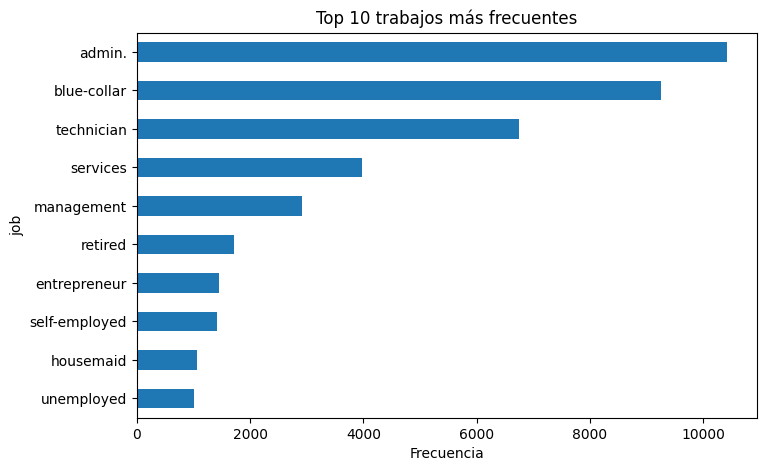

In [ ]:
df['job'].value_counts().head(10)
df['job'].value_counts().head(10).plot(kind='barh', figsize=(8, 5))
plt.xlabel('Frecuencia')
plt.title('Top 10 trabajos más frecuentes')
plt.gca().invert_yaxis()  #  para que el más frecuente quede arriba
plt.show()

Análisis sobre variables numéricas

'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'

In [31]:
fig = plt.figure(figsize=(10, 30), gridspec_kw={'height_ratios': [6, 2]*10})  # Ajusta el tamaño de la figura si es necesario



# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "duration").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "duration")
sns.histplot(ax = axis[2, 0], data = df, x = "campaign").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "campaign")
sns.histplot(ax = axis[2, 1], data = df, x = "pdays").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "pdays")
sns.histplot(ax = axis[4, 0], data = df, x = "previous").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x = "previous")
sns.histplot(ax = axis[4, 1], data = df, x = "emp.var.rate").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "emp.var.rate")
sns.histplot(ax = axis[6, 0], data = df, x = "cons.price.idx").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = df, x = "cons.price.idx")
sns.histplot(ax = axis[6, 1], data = df, x = "cons.conf.idx").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = df, x = "cons.conf.idx")
sns.histplot(ax = axis[8, 0], data = df, x = "euribor3m").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = df, x = "euribor3m")
sns.histplot(ax = axis[8, 1], data = df, x = "nr.employed").set(xlabel = None)
sns.boxplot(ax = axis[9, 1], data = df, x = "nr.employed")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'gridspec_kw'

OUTLIERS:

age, duration, campain

age. Edad del cliente (numérico)
job. Tipo de trabajo (categórico)
marital. Estado civil (categórico)
education. Nivel de educación (categórico)
** default. ¿Tiene crédito actualmente? (categórico) **
housing. ¿Tiene un préstamo de vivienda? (categórico)
loan. ¿Tiene un préstamo personal? (categórico)
contact. Tipo de comunicación de contacto (categórico)
month. Último mes en el que se le ha contactado (categórico)
day_of_week. Último día en el que se le ha contactado (categórico)
duration. Duración del contacto previo en segundos (numérico)
campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
poutcome. Resultado de la campaña de marketing anterior (categórico)

emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
nr.employed. Número de empleados. Indicador trimestral (numérico)

y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)

Análisis de variables multivariante